# Neural Network & Fuzzy Systems Project
# Image Classification & Model Comparison Using Different Deep Learning Techniques
## Name: Md. Saiful Bari Siddiqui
## Student ID : Not Yet Given

### Importing Necessary Packages

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

## Loading Fashion Mnist Dataset

In [3]:
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


## Data Preprocessing

In [4]:
# Reshaping data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
num_classes = 10

# Normalizing data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## DL Model Designing

## CNN with 2  2XConvolutional & Maxpooling Layers

In [19]:
batch_size = 128
num_classes = 10
epochs = 10

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28X28 with 1 byte color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'), 
    # 10 output neuron. It will contain a value from 0-9 for each classes
    tf.keras.layers.Dense(num_classes, activation='softmax')  
])


In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                 

## Model Compilation

In [21]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Model Training

In [22]:
hist = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.5440 - accuracy: 0.7994 - val_loss: 0.3624 - val_accuracy: 0.8679
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3068 - accuracy: 0.8875 - val_loss: 0.2904 - val_accuracy: 0.8926
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2483 - accuracy: 0.9086 - val_loss: 0.2672 - val_accuracy: 0.9038
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2140 - accuracy: 0.9204 - val_loss: 0.2542 - val_accuracy: 0.9072
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1884 - accuracy: 0.9308 - val_loss: 0.2380 - val_accuracy: 0.9160
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1686 - accuracy: 0.9376 - val_loss: 0.2483 - val_accuracy: 0.9118
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1510 - accuracy: 0.9445 - val_loss: 0.2473 - val_accuracy: 0.9175
Epoch

## Model Evaluation

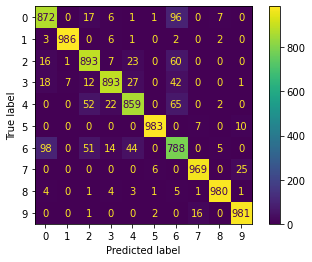

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = model.predict(x_test)
y_pred=np.argmax(pred,axis=1)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Disp = ConfusionMatrixDisplay(Confusion_Matrix)
Disp.plot()
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score, cohen_kappa_score, f1_score, matthews_corrcoef, log_loss, accuracy_score

y_pred_proba = model.predict(x_test)

ROC_AUC = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
Cohen_Kappa = cohen_kappa_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred, average='macro')
Matthews = matthews_corrcoef(y_test, y_pred)
Log = log_loss(y_test, y_pred_proba)
Accuracy = accuracy_score(y_test, y_pred)

print('ROC_AUC Score:', ROC_AUC)
print('Cohen_Kappa Score:', Cohen_Kappa)
print('F1 Score:', F1)
print('Matthews Correlation Coefficient:', Matthews)
print('Log Loss:', Log)
print('Accuracy:', Accuracy)

ROC_AUC Score: 0.9945758722222223
Cohen_Kappa Score: 0.9115555555555556
F1 Score: 0.9208548884222626
Matthews Correlation Coefficient: 0.9115999009048944
Log Loss: 0.2553248795011912
Accuracy: 0.9204


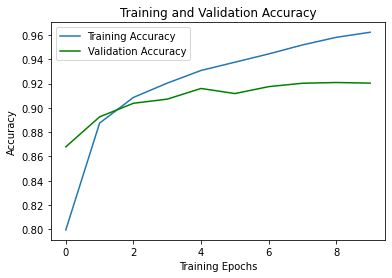

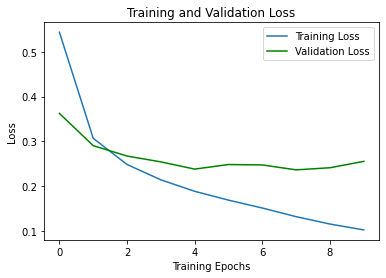

In [25]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = hist.history[     'accuracy' ]
val_acc  = hist.history[ 'val_accuracy' ]
loss     = hist.history[    'loss' ]
val_loss = hist.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc, color = 'g')
plt.title ('Training and Validation Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.savefig('Accuracy DIP.pdf')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss, color = 'g' )
plt.title ('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Training Epochs')
plt.ylabel('Loss')

plt.savefig('Loss DIP.pdf')

## Visualization of Layer Outputs

C:\Users\USER\AppData\Local\Temp/ipykernel_12824/911793021.py:48: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


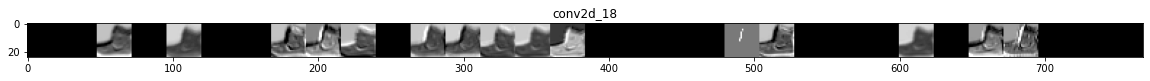

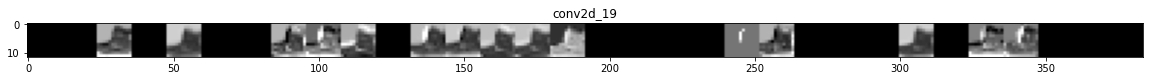

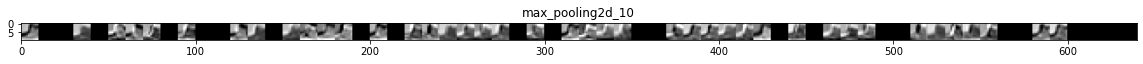

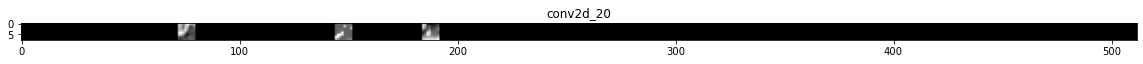

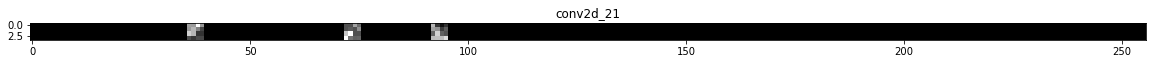

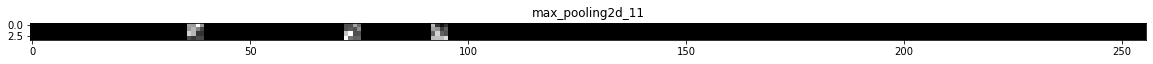

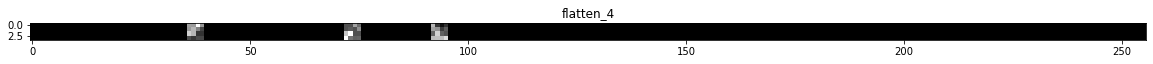

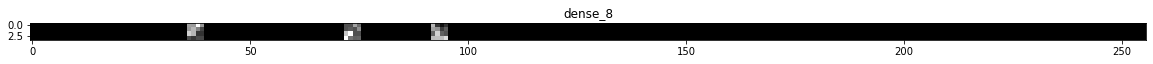

In [26]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = x_train[0,:,:,:]

x   = img_to_array(img)                           # Numpy array with shape (28, 28)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 28, 28)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
    if len(feature_map.shape) == 4:
    
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='gray' ) 

## Feed Forward DNN Model with 2 Hidden Layers

In [27]:
batch_size = 128
num_classes = 10
epochs = 10

model = tf.keras.models.Sequential([
    # Flatten the inputs to feed into a DNN
    tf.keras.layers.Flatten(input_shape=input_shape), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'), 
    # 10 output neuron. It will contain a value from 0-9 for each classes
    tf.keras.layers.Dense(num_classes, activation='softmax')  
])


In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## Model Compilation

In [29]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Model Training

In [30]:
hist = model.fit(x_train, y_train, epochs = epochs, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5008 - accuracy: 0.8180 - val_loss: 0.5368 - val_accuracy: 0.8086
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3992 - accuracy: 0.8621 - val_loss: 0.4128 - val_accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3800 - accuracy: 0.8695 - val_loss: 0.4515 - val_accuracy: 0.8570
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3681 - accuracy: 0.8758 - val_loss: 0.4306 - val_accuracy: 0.8631
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3605 - accuracy: 0.8808 - val_loss: 0.4391 - val_accuracy: 0.8676
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3550 - accuracy: 0.8828 - val_loss: 0.4410 - val_accuracy: 0.8665
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3453 - accuracy: 0.8861 - val_loss: 0.4874 - val_accuracy:

## Model Evaluation

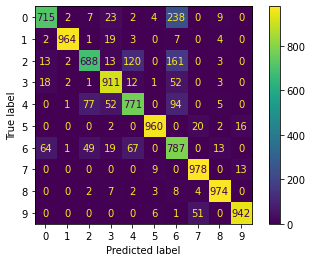

In [31]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Disp = ConfusionMatrixDisplay(Confusion_Matrix)
Disp.plot()
plt.show()

In [32]:
y_pred_proba = model.predict(x_test)

ROC_AUC = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
Cohen_Kappa = cohen_kappa_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred, average='macro')
Matthews = matthews_corrcoef(y_test, y_pred)
Log = log_loss(y_test, y_pred_proba)
Accuracy = accuracy_score(y_test, y_pred)

print('ROC_AUC Score:', ROC_AUC)
print('Cohen_Kappa Score:', Cohen_Kappa)
print('F1 Score:', F1)
print('Matthews Correlation Coefficient:', Matthews)
print('Log Loss:', Log)
print('Accuracy:', Accuracy)

ROC_AUC Score: 0.987788538888889
Cohen_Kappa Score: 0.8544444444444445
F1 Score: 0.8706240818859878
Matthews Correlation Coefficient: 0.8553697421685733
Log Loss: 0.4314884758597253
Accuracy: 0.869


Text(0, 0.5, 'Loss')

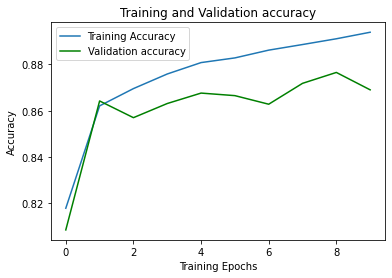

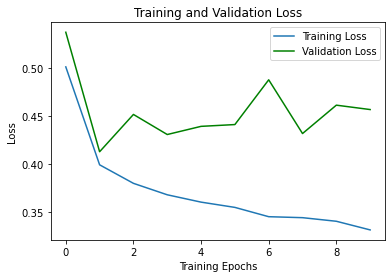

In [33]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = hist.history[     'accuracy' ]
val_acc  = hist.history[ 'val_accuracy' ]
loss     = hist.history[    'loss' ]
val_loss = hist.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc, color = 'g')
plt.title ('Training and Validation accuracy')
plt.legend(['Training Accuracy','Validation accuracy'])
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss, color = 'g' )
plt.title ('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Training Epochs')
plt.ylabel('Loss')

## Visualization of layers

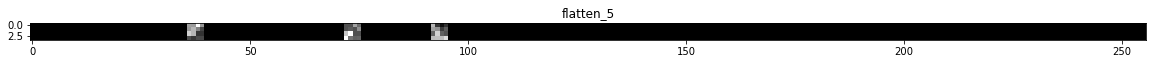

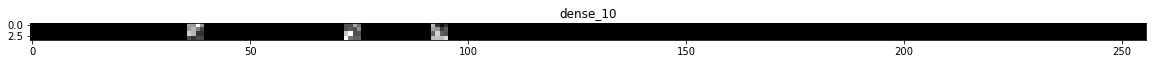

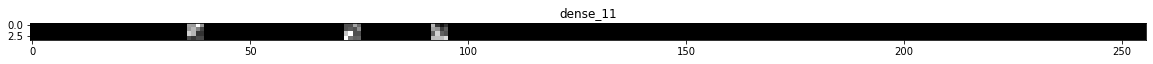

In [34]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = x_train[47,:,:,:]

x   = img_to_array(img)                           # Numpy array with shape (28, 28)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 28, 28)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
    if len(feature_map.shape) == 4:
    
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='gray' ) 

## CNN with 2 Convolutional & Maxpooling Layers

In [5]:
batch_size = 128
num_classes = 10
epochs = 12

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28X28 with 1 byte color
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'), 
    # 10 output neuron. It will contain a value from 0-9 for each digits
    tf.keras.layers.Dense(num_classes, activation='softmax')  
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               102656    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

## Model Compilation

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Model Training

In [8]:
hist = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 19s 321us/sample - loss: 0.5886 - acc: 0.7873 - val_loss: 0.4641 - val_acc: 0.8291
Epoch 2/12
60000/60000 [==============================] - 16s 263us/sample - loss: 0.4018 - acc: 0.8535 - val_loss: 0.4435 - val_acc: 0.8352
Epoch 3/12
60000/60000 [==============================] - 16s 267us/sample - loss: 0.3516 - acc: 0.8704 - val_loss: 0.3547 - val_acc: 0.8689
Epoch 4/12
60000/60000 [==============================] - 16s 274us/sample - loss: 0.3200 - acc: 0.8814 - val_loss: 0.3312 - val_acc: 0.8777
Epoch 5/12
60000/60000 [==============================] - 17s 279us/sample - loss: 0.2956 - acc: 0.8907 - val_loss: 0.3170 - val_acc: 0.8813
Epoch 6/12
60000/60000 [==============================] - 17s 277us/sample - loss: 0.2783 - acc: 0.8973 - val_loss: 0.3062 - val_acc: 0.8857
Epoch 7/12
60000/60000 [==============================] - 17s 275us/sample - loss: 0.2610 - acc: 0.9032 

## Model Evaluation

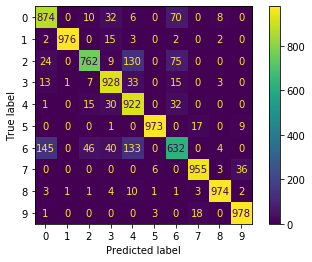

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict_classes(x_test)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Disp = ConfusionMatrixDisplay(Confusion_Matrix)
Disp.plot()
plt.show()

In [10]:
from sklearn.metrics import roc_auc_score, cohen_kappa_score, f1_score, matthews_corrcoef, log_loss, accuracy_score

y_pred_proba = model.predict_proba(x_test)

ROC_AUC = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
Cohen_Kappa = cohen_kappa_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred, average='macro')
Matthews = matthews_corrcoef(y_test, y_pred)
Log = log_loss(y_test, y_pred_proba)
Accuracy = accuracy_score(y_test, y_pred)

print('ROC_AUC Score:', ROC_AUC)
print('Cohen_Kappa Score:', Cohen_Kappa)
print('F1 Score:', F1)
print('Matthews Correlation Coefficient:', Matthews)
print('Log Loss:', Log)
print('Accuracy:', Accuracy)

ROC_AUC Score: 0.9926906388888888
Cohen_Kappa Score: 0.886
F1 Score: 0.8962099772986614
Matthews Correlation Coefficient: 0.8865927968043295
Log Loss: 0.2986820134284678
Accuracy: 0.8974


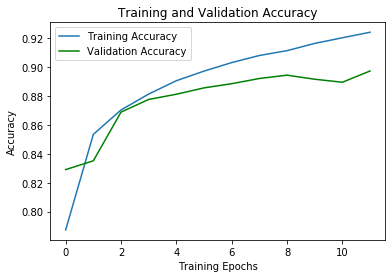

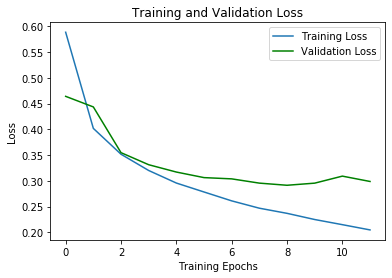

In [11]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = hist.history[     'acc' ]
val_acc  = hist.history[ 'val_acc' ]
loss     = hist.history[    'loss' ]
val_loss = hist.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc, color = 'g')
plt.title ('Training and Validation Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.savefig('Accuracy DIP.pdf')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss, color = 'g' )
plt.title ('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Training Epochs')
plt.ylabel('Loss')

plt.savefig('Loss DIP.pdf')

## Visualization of Layer Outputs

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


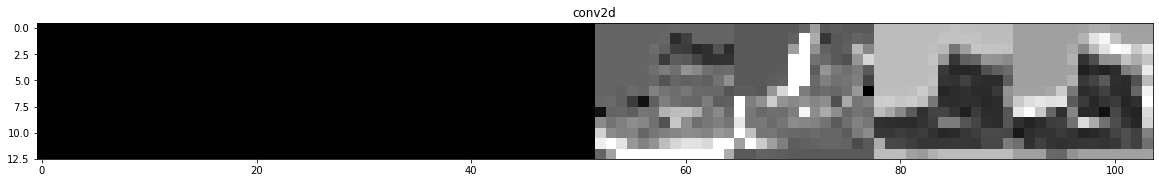

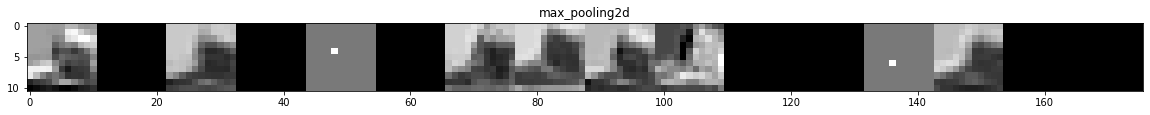

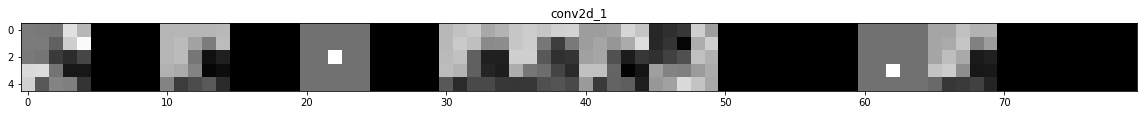

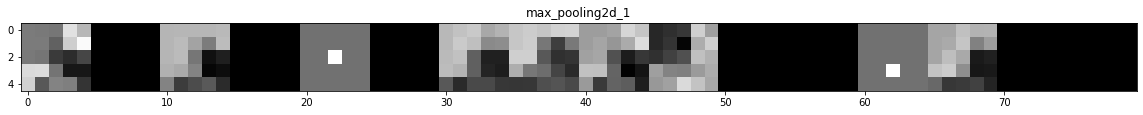

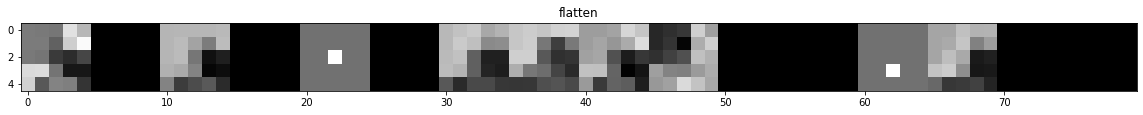

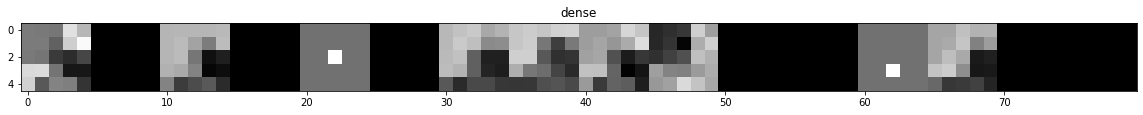

In [12]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = x_train[0,:,:,:]

x   = img_to_array(img)                           # Numpy array with shape (28, 28)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 28, 28)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
    if len(feature_map.shape) == 4:
    
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='gray' ) 